#Import requried packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
Data collection: The first step is to collect the data from different sources and organize it into a structured format.

In [4]:
df = pd.read_csv('Car price prediction Data Set.csv')

In [5]:
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


# 2. Data cleaning
Data cleaning is an essential step in the data analysis process, where the data is checked and cleaned to ensure that it is accurate, complete, and consistent. The following are the general steps involved in data cleaning:

In [26]:
df.nunique()

Id                     53515
Maker                      8
model                     23
Location                  11
Distance               18676
Owner Type                 4
manufacture_year          55
Age of car                55
engine_displacement      555
engine_power             199
body_type                  2
Vroom Audit Rating         5
transmission               2
door_count                 7
seat_count                10
fuel_type                  2
Price                  20550
dtype: int64

###**2.1 Data auditing:** 
The first step is to audit the data by looking at the values and identifying any inconsistencies, errors, or missing values. This can be done by exploring the data, checking for data types, and looking at the distribution of values.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

###**2.2 Handling missing data:** 
The next step is to handle any missing data by either removing the missing values or imputing them. If a large percentage of data is missing, it may be necessary to drop the entire column or row. Imputation methods can include filling in missing values with the mean or median, or using more advanced techniques like regression or k-nearest neighbors.

In [28]:
print(df.isnull().sum())

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64


In [29]:
new_df = df.drop(['body_type'],axis=1)
new_df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,7,auto,4,5,diesel,3085561.50


In [41]:
new_df[['engine_power','Distance ']] = new_df[['engine_power','Distance ']].fillna(new_df[['engine_power','Distance ']].mean())

In [42]:
print(new_df.isnull().sum())

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64


###**2.3 Handling duplicate data:** 
The third step is to handle any duplicate data by either dropping the duplicates or merging them. Duplicate data can occur due to data entry errors, system errors, or other factors.

In [45]:
new_df.duplicated().sum()

0

In [46]:
new_df.drop_duplicates(inplace=True)

###**2.4 Data transformation:** 
The final step is to transform the data to make it more suitable for analysis. This can include scaling the data, converting categorical data to numerical data, or creating new variables by combining existing variables.

In [69]:
categorical = []
numerical = []
for i in new_df.columns:
    if new_df[i].dtype == 'int64' or new_df[i].dtype == 'float64':
        numerical.append(i)
    else:
        categorical.append(i)

In [70]:
categorical

['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type']

In [71]:
numerical

['Id',
 'Distance ',
 'manufacture_year',
 'Age of car',
 'engine_displacement',
 'engine_power',
 'Vroom Audit Rating',
 'door_count',
 'seat_count',
 'Price']

In [64]:
category_column = ['door_count','seat_count']  # replace with the name of the categorical column
category_dict={'None':0,'1':1,'2':2,
              '3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}
for col in category_column:
  new_df[col] = new_df[col].map(category_dict)

# 3. Data exploration
Data exploration is a crucial step in the data analysis process, where we examine and analyze the data to gain insights, identify patterns, and formulate hypotheses. The following are the general steps involved in data exploration:

In [74]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53515 entries, 0 to 53514
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             53515 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         53515 non-null  float64
 10  Vroom Audit Rating   53515 non-null  int64  
 11  transmission         53515 non-null  object 
 12  door_count           53515 non-null  int64  
 13  seat_count           53515 non-null  int64  
 14  fuel_type            53515 non-null  object 
 15  Price                53515 non-null 

###**3.1 Variable identification:** 
The first step is to identify the variables in the dataset and determine their data types. This can include identifying continuous, categorical, and binary variables.

In [72]:
categorical

['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type']

In [73]:
numerical

['Id',
 'Distance ',
 'manufacture_year',
 'Age of car',
 'engine_displacement',
 'engine_power',
 'Vroom Audit Rating',
 'door_count',
 'seat_count',
 'Price']

###**3.2 Univariate analysis:** 
The next step is to perform a univariate analysis, where we analyze each variable individually. This can include calculating summary statistics, creating frequency tables, and visualizing the data using histograms, box plots, or bar charts.

Id
Skew : 0.0


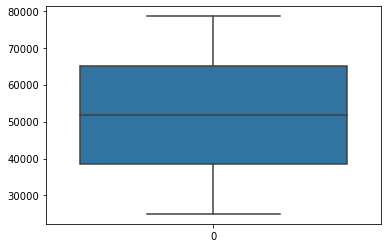

Distance 
Skew : 23.6


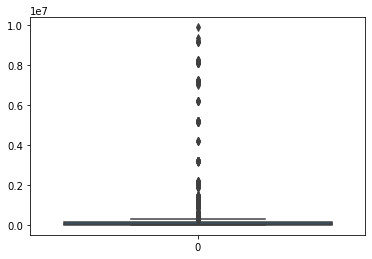

manufacture_year
Skew : -1.91


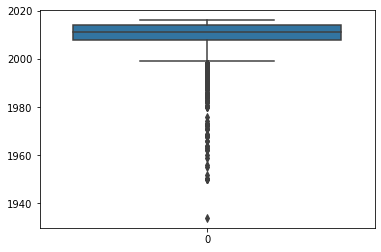

Age of car
Skew : 1.91


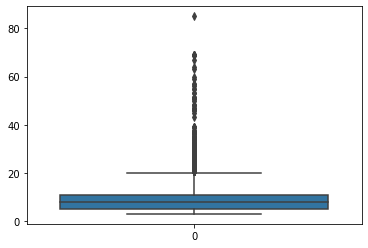

engine_displacement
Skew : 12.73


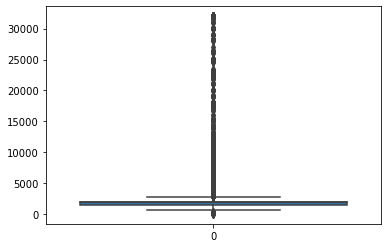

engine_power
Skew : 1.78


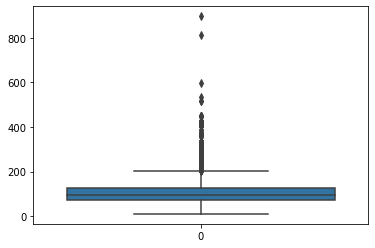

Vroom Audit Rating
Skew : 0.0


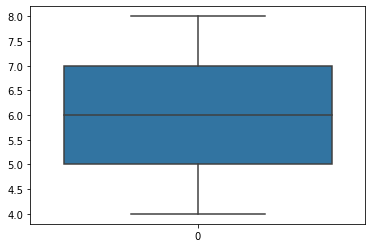

Price
Skew : 2.18


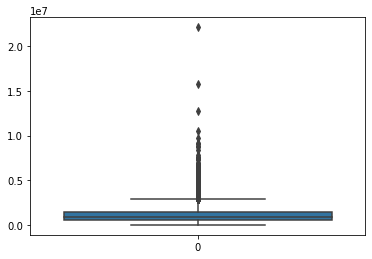

In [51]:
for i in numerical:
    print(i)
    print('Skew :', round(new_df[i].skew(), 2))
    sns.boxplot(data=new_df[i])
    plt.show()

Maker


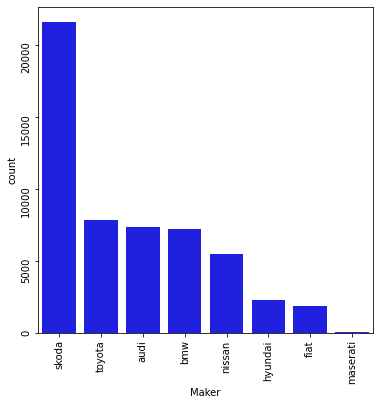

model


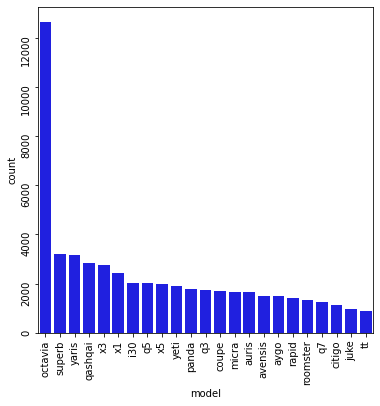

Location


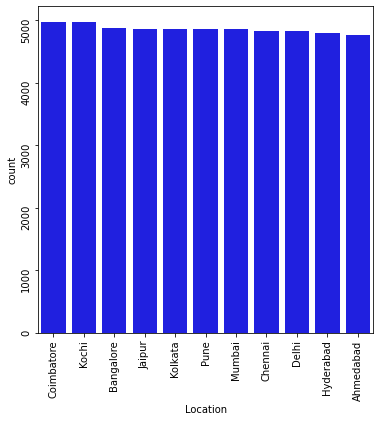

Owner Type


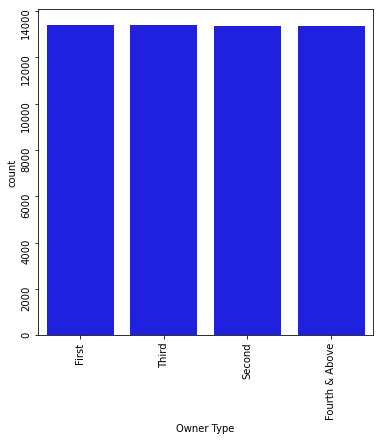

transmission


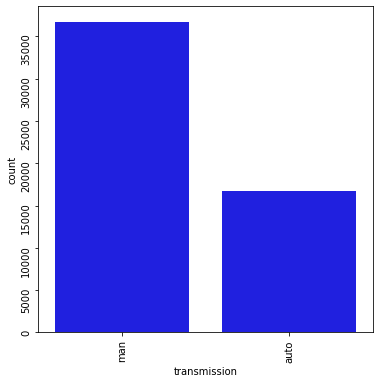

door_count


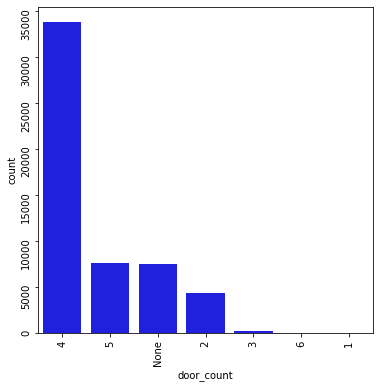

seat_count


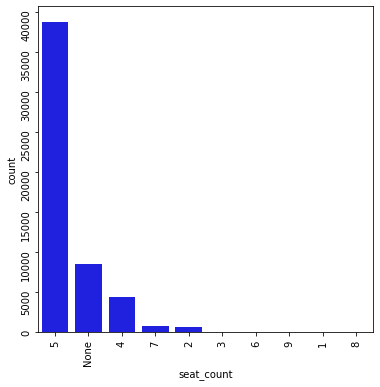

fuel_type


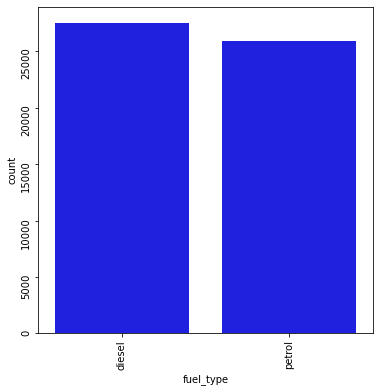

In [52]:
for i in categorical:
    fig, axes = plt.subplots(figsize = (6, 6))
    print(i)
    sns.countplot(x=i,data=new_df,color='blue',order=new_df[i].value_counts().index)
    axes.tick_params(labelrotation=90)
    plt.show()

###**3.3 Bivariate analysis:**
The third step is to perform a bivariate analysis, where we analyze the relationship between two variables. This can include calculating correlation coefficients, creating scatter plots, or comparing means using t-tests or ANOVA.

Maker


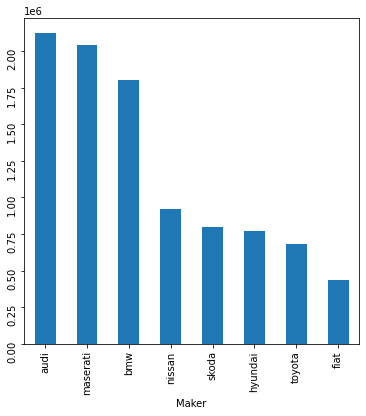

model


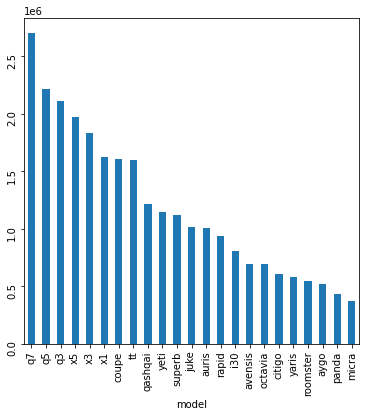

Location


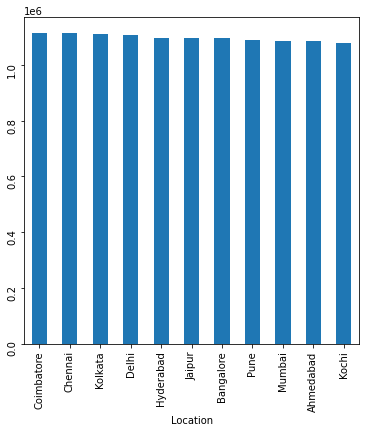

Owner Type


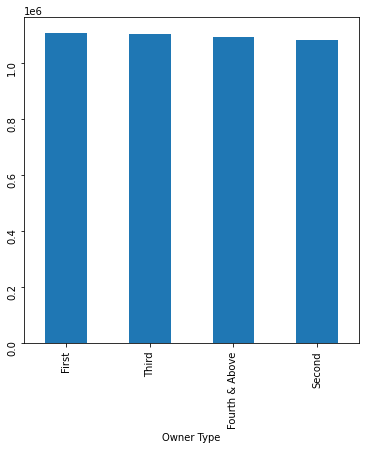

transmission


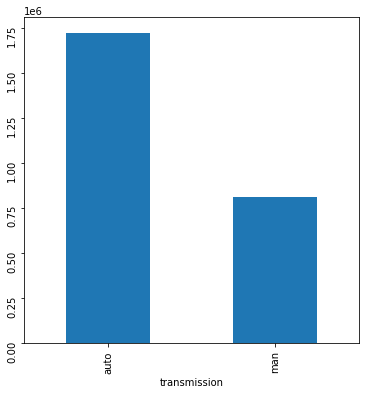

door_count


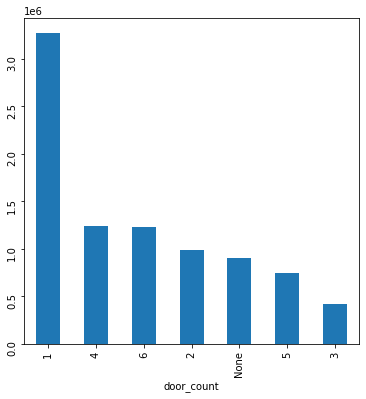

seat_count


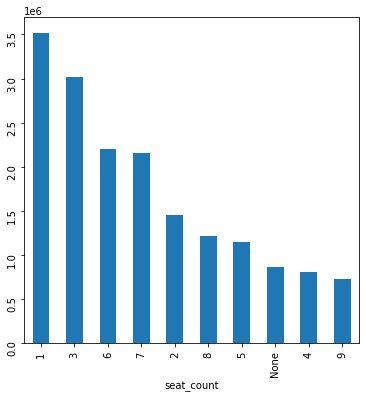

fuel_type


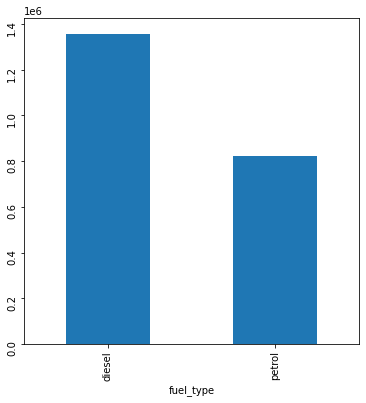

In [53]:
for i in categorical:
    fig, axes = plt.subplots(figsize = (6, 6))
    print(i)
    new_df.groupby(i)['Price'].mean().sort_values(ascending=False).plot.bar()
    axes.tick_params(labelrotation=90)
    plt.show()

###**3.4 Multivariate analysis:**
The final step is to perform a multivariate analysis, where we analyze the relationship between multiple variables. This can include creating heat maps, cluster analysis, or principal component analysis.

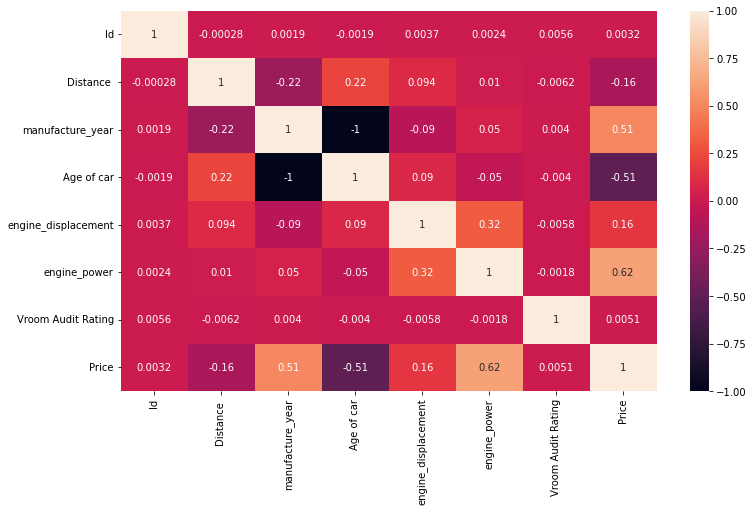

In [54]:
plt.figure(figsize=(12, 7))
sns.heatmap(new_df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# 4 Data visualization
create visual representations of the data to better understand its patterns and relationships. This can be done using histograms, scatter plots, box plots, heat maps, and other visualizations.

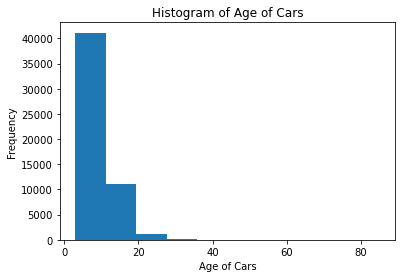

In [60]:
plt.hist(new_df['Age of car'], bins=10)

plt.xlabel('Age of Cars')
plt.ylabel('Frequency')
plt.title('Histogram of Age of Cars')
plt.show()

# 5 Data analysis
The fifth step is to analyze the data using statistical techniques such as regression, correlation, clustering, and classification to identify patterns, trends, and relationships.